# Cross Comparing Stratigraphic Sets: Working Around Real Data

#     Python Introduction to Earth Science (EPS 88) Final Project, Fall 2019

# Violet A.B. Walsh

This project examines and compares two data sets of interest related to paleoclimatology. This subject is personally relevant to me as an undergraduate researcher in Prof. David Wahl's Quaternary Paleoecology Laboratory, where I frequently proccess samples like the ones from which this data was collected. 

The two sets contrasted here are pollen counts from Clear Lake, CA. First sediment was extracted from a lake core, then proccessed to extract pollen, and lastly it was mounted on a slide and counted. Since pollen from different flora are distinct, they can usually be identified to the genus by an experienced palynologist. Additionally, the pollen present in a given assemblage is considered to be reflective of the local flora and yields information about the local species composition and abundance. By counting the pollen on slides made from different depths throughout the sediment core it's possible to view changes indicitive of climatic shifts over time, such as changing species composition, which allow pollen to be used as a "paleoproxy" for past climates. This work is becoming increasingly relevant as scientists seek to understand how biota responded to past climate changes in order to make informed predictions about the future.

Each of the two sets in this experiment were collected by different researchers. One was learning to count pollen at the time, while the other was an experienced palynologist. As you will notice, there are differences between the counts. Due to the nature of sediment core sampling, the same depth can only ever be sampled once, so each set was collected for samples at unique depths. Theoretically, the intermediate depth values should integrate smoothly into the trends of either set if both are equally representative of the samples. Any extreme differences would allude to inaccuracy in one or both sets, and could call into question the validity of the counting process used. This is an important excersize because it yields information as to mistakes or consistent misidentifications within the sets.

# Project Question: 
What are the differences are there between the sets and what are some implications of those? Are both results similar enough that both counts can be considered accurate?

# Components:
Data Visualization 1:
In order to answer this question, I will first need to design a method for creating count-depth diagrams in Python. Currently, this essential visual is created with a combination of Excel, R, and visual editing tools by my lab. Stratigraphic diagrams of this type are the basis for interpreting shifts in species composition, and extrapolating climatic shifts.

Data Visualization 2:
Since conifer pollen is abundant in the samples, I will also look at the breakdown of conifer types in each set as a proxy for their similarity. 

Data Visualization 3:
The kind of variation that would be important between the sets is differences in species compositions over depth, differences like those visible in Data Visualization 1. In order to see this for conifers across the two sets together, I will modify my earlier graphs in order to see both sets together-- however, by not having exactly the same axis for comparison will limit this otherwsie essetial approach.

Data Visualization 3.5:
Since I can't compare exactly the same axis, as each set counted slightly different categories, I will also attempt to look as overall pollen deposition rates. If total pollen deposition across the samples is consistent (regardless of distribution of the totals across genera) it would be a positive indicator for the reliability of each set.

Data Analysis 1:
So far the sets look similar, so in order to gain more insight into any variation I will examine the Pinus (pine) counts more closely. This is a good proxy for the overall set since it is a large fraction of the overall composition of not only conifers, but the whole set. Plot a linear regression for the pine counts. Sources: https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d, https://hackernoon.com/types-of-linear-regression-w4o227s5

Data Analysis 1.5:
But wait, isn't the amount of conifer pollen a function of multiple variables includig depth and the total count? That leads me to consider a Multiple Linear Regression plot, and see if it looks any different. By also plotting the residuals from this linear regression, I can interpret the reliability of the data as well. Sources: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

Data Analysis 2:
Lastly, I should examine my confidence intervals for the two sets. Visualizing this helps put any conclusions made in context of their reliability. Sources: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-23-point.html

# Code and Final Project Steps:

Step 0: Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import random
import math
import scipy as sp
import scipy.stats as stats
from scipy.interpolate import interp1d
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib import cm
from sklearn.linear_model import LinearRegression

Step 1: Convert to CSVs and import the data. These are very messy and will require extensive cleaning. I converted these counts from an excel sheet which was not set up to graph in Python.

In [2]:
rcounts = pd.read_csv('/Users/Violet/Desktop/Notes-and-Readings/EPS 88/final_project/RCLPollen/rcounts-raw.csv')
rcounts.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,Unnamed: 105
0,Depth,Abies,Picea,Pinus,Pinus (white),Ephedra,Pseudotsuga,TCT,Juniperus/Cupressus,Tsuga mertensiana,...,Unknown C,Unknown D,Unknown E,Unknown F,Indeterminate,Other unknowns,Zea,Lycopodium,APFAC,Total Pollen and Spores
1,13.64,0,0,54,0,0,1,0,8,25,...,0,0,0,0,15,24,560,241,2085,422
2,14.56,1,0,55,0,0,1,26,5,0,...,0,0,0,0,26,30,310,223,2085,477
3,15.51,4,0,60,0,0,0,34,5,3,...,0,0,0,0,26,17,258,207,2085,561
4,16.48,5,1,69,0,0,0,39,3,1,...,0,0,0,0,0,0,288,231,2085,486


In [3]:
mcounts = pd.read_csv('/Users/Violet/Desktop/Notes-and-Readings/EPS 88/final_project/MCLPollen/mcounts-raw.csv')
mcounts.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1,2,3,4,5,...,98,99,100,101,102,103,104,Unnamed: 109,Unnamed: 110,Unnamed: 111
0,Date Counted,Notes/Possible Issues,Section Number and Depth,Roger's Depth(Original Field Depths),Indeterminate Conifer,Abies,Picea,Pinus,Pinus (white),Ephedra,...,Unknown E,Unknown F,Indeterminate,Other unknowns,Zea,Lycopodium,APFAC,Sum of all pollen,NaN,NaN
1,September of 2018,"Cooked by Sheehan, Way more indeterminate. Not...",CL12-1A-4H-2-30,9.43,7,NaN,NaN,25,NaN,NaN,...,NaN,NaN,109,50,NaN,31,NaN,293,NaN,NaN
2,September of 2019,Roger/Marie Cook,CL12-1A-6H-2-134,16.85,5,NaN,2,28,NaN,NaN,...,NaN,NaN,74,3,72,181,NaN,426,NaN,NaN
3,September of 2019,Roger/Marie Cook,CL12--1A-7H-1-84,17.89,3,NaN,5,37,NaN,NaN,...,NaN,NaN,57,7,67,198,NaN,444,NaN,NaN
4,November of 2018,"Roger/Marie Cook, learned Dryopteris for first...",CL12-1A-7H-2-84,18.91,NaN,3,7,66,NaN,NaN,...,NaN,NaN,28,22,285,211,NaN,401,NaN,NaN


Step 2: Simplify data sets. Remove columns w/o counts, remove notes, standardize columns across the two.

In [4]:
#replace NaNs with 0s
mcounts = mcounts.fillna(0)
rcounts = rcounts.fillna(0)

#remove columns of notes such that dfs only contain data and have the same indices
a = mcounts.drop('Unnamed: 0', axis=1)
b = a.drop('Unnamed: 1', axis=1)
mcounts = b.drop('Unnamed: 2', axis=1)

In [5]:
##use genus labels from row 1 for column headers
mcounts = mcounts.rename(columns=mcounts.iloc[0])
mcounts = mcounts.drop(0, axis=0)

rcounts = rcounts.rename(columns=rcounts.iloc[0])
rcounts = rcounts.drop(0, axis=0)

In [6]:
##Standardize column names for depth and pollen sums
mcounts = mcounts.rename(columns={"Roger's Depth(Original Field Depths)": "Depth"})
mcounts_clean = mcounts.rename(columns={"Sum of all pollen": "Total"})

rcounts_clean = rcounts.rename(columns={"Total Pollen and Spores": "Total"})

In [7]:
##make sure type(data) == str, this causes problems graphing later
mcounts_clean["Depth"] = mcounts_clean["Depth"].apply(float)
mcounts_clean["Total"] = mcounts_clean["Total"].apply(float)

rcounts_clean["Depth"] = rcounts_clean["Depth"].apply(float)
rcounts_clean["Total"] = rcounts_clean["Total"].apply(float)

In [8]:
mcounts_clean.head()

,Depth,Indeterminate Conifer,Abies,Picea,Pinus,Pinus (white),Ephedra,Pseudotsuga,TCT,Juniperus/Cupressus,...,Unknown E,Unknown F,Indeterminate,Other unknowns,Zea,Lycopodium,APFAC,Total,0.0,0.0
1,9.43,7,0,0,25,0,0,0,9,0,...,0,0,109,50,0,31,0,293.0,0.0,0.0
2,16.85,5,0,2,28,0,0,3,48,0,...,0,0,74,3,72,181,0,426.0,0.0,0.0
3,17.89,3,0,5,37,0,0,0,59,0,...,0,0,57,7,67,198,0,444.0,0.0,0.0
4,18.91,0,3,7,66,0,0,1,30,0,...,0,0,28,22,285,211,0,401.0,0.0,0.0
5,19.31,0,0,5,84,0,0,2,51,0,...,0,0,39,18,307,302,0,621.0,0.0,0.0


In [9]:
rcounts_clean.head()

,Depth,Abies,Picea,Pinus,Pinus (white),Ephedra,Pseudotsuga,TCT,Juniperus/Cupressus,Tsuga mertensiana,...,Unknown C,Unknown D,Unknown E,Unknown F,Indeterminate,Other unknowns,Zea,Lycopodium,APFAC,Total
1,13.64,0,0,54,0,0,1,0,8,25,...,0,0,0,0,15,24,560,241,2085,422.0
2,14.56,1,0,55,0,0,1,26,5,0,...,0,0,0,0,26,30,310,223,2085,477.0
3,15.51,4,0,60,0,0,0,34,5,3,...,0,0,0,0,26,17,258,207,2085,561.0
4,16.48,5,1,69,0,0,0,39,3,1,...,0,0,0,0,0,0,288,231,2085,486.0
5,17.07,0,1,113,0,0,1,37,7,0,...,0,0,0,0,17,11,367,136,2085,531.0


Make a list of every species included on a standard pollen count sheet, but drop the ones which appeared in neither set. Certain species should not appear here, as the sets come from a very particular geographic region.

In [10]:
species = ['Abies','Picea','Pinus','Pinus (white)','Ephedra','Pseudotsuga','TCT','Juniperus/Cupressus','Tsuga mertensiana','Tsuga heterophylla','Acer','Acer negundo','Quercus','Q. chrysolepis/Q. vaccinifolia','Aesculus','Lithocarpus/Castanopsis','Fraxinus','Juglans','Garrya','Platanus','Fremontia','Rosaceae','Adenostoma','Cercocarpus','Rhamnaceae','Ceanothus','Cephalanthus','Sambucus','Shepherdia','Elaeagnus','Sanguisorba','Ribes','Purshia','Salix','Myrica','Corylus','Alnus','Artemisia','Ambrosia','Liguliflorae','Compositae HS','Compositae LS','Ericaceae','Linaceae','Cruciferae','Arceuthobium','Caryophyllaceae','Malvaceae','Liliaceae','Leguminosae','Onagraceae','Labiatae','Salvia','Eriogonum','Polygonum amphibium','Polygonum californica','Vitis','Plantago','Polemoniaceae','Navarettia','Ranunculaceae','Umbelliferae','Rubiaceae','Thalictrum','Rhus','Lonicera','Amaranthaceae','Sarcobatus','Poaceae','Cyperaceae','Typha latifolia','Typha/Sparganium','Potamogeton','Isoetes','Equisetum','Myriophyllum','Ruppia','Nuphar hydropotes','Nuphar','Brasenia','Menyanthes','Dryopteris','Polypodium','Pteridium','Botrychium','Athyrium','Polystichum','Selaginella','Trilete','Monolete','Colonial fungi','Coprophilous fungi','Unknown A','Unknown B','Unknown C','Unknown D','Unknown E','Unknown F','Indeterminate','Other unknowns','Zea','Lycopodium']

In [11]:
##remove columns where neither count has any values, prevent NaN errors later on
for i in species:
    for x in range(1,25):
        if mcounts_clean[i][x]==0 and rcounts_clean[i][x] == 0:
            mcounts_clean = mcounts_clean.drop(i,axis=1)
            rcounts_clean = rcounts_clean.drop(i,axis=1)
        elif mcounts_clean[i][x] != 0:
            mcounts_clean
        elif rcounts_clean[i][x] != 0:
            rcounts_clean
        else:
            print("Uh oh")

Step 3: Graph and format both data sets with an age-depth model, looking for discrepancies. Presenting this data nicely enough for a poster or published paper should be non-trivial.

This graphing process is incredibly useful not only for this project, but any future pollen counts as well. This is the first Python method for graphing pollen counts/stratigraphic diagrams used in my lab. The design process was non-trivial for a beginning Python user, since it had to be done in a way that made the plots easily manipulatable. Notice the NOTES below, which explain how to easily look at any chosen genera from either data set by adjusting two lists, 'geni_m' and 'geni_r'.

**NOTE: Fill geni_n = [ ] with genus names you want to plot as strings.

For the sake of the project, this example include the confiers counted, but any selection could be graphed under this set up. Notice that genera are color coded by climate type. An increase in conifers is associated with cooling in this region, so they are considered "cool types" and are ploted in blue. This is inetractive-- feel free to play around with it and see what happens to a warm type like Quercus (Oak) as compared to cool conifers.

# Data Visualization 1

**NOTE: Set data = rcounts_clean, or data = mcounts_clean to specify which data set you want to visualize. These are essentially complicated hypsometric curves.

In [81]:
##chose which species to plot by listing them in geni = []
geni_m = ["Indeterminate Conifer","Abies","Pinus","Picea","Juniperus/Cupressus","Tsuga mertensiana","Tsuga heterophylla"]

climate_types = {}
geni_warm = ["Quercus"]
geni_cold = ["Abies","Pinus","Picea","Juniperus/Cupressus","Tsuga mertensiana","Tsuga heterophylla","Indeterminate Conifer"]
geni_other = ["Acer"]

for genus in geni_warm:
    climate_types[genus]=0
    
for genus in geni_cold:
    climate_types[genus]=1
    
for genus in geni_other:
    climate_types[genus]=2

This code cell is currently graphing the mcounts dataset.

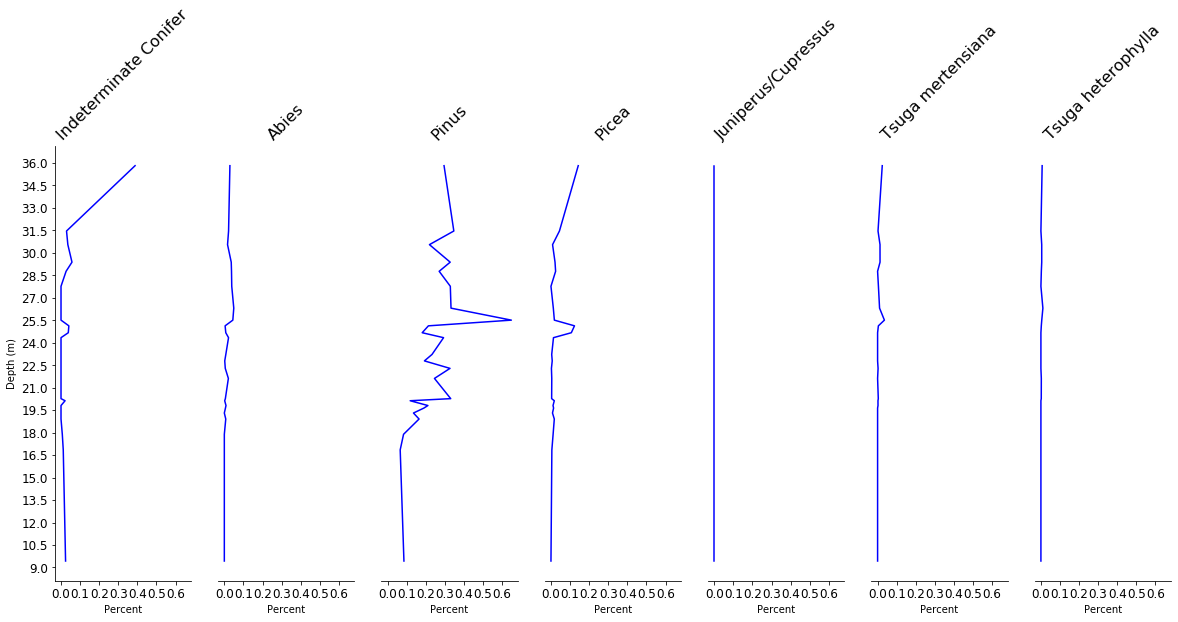

In [65]:
###select which df or data set to operate on
data = mcounts_clean

#this graphs subplots for each listed species and formats the image

ncols = len(geni_m)

fig, axs = plt.subplots(1, ncols, sharey= True, sharex = True, figsize = (20,8))

for i,ax in enumerate(axs.ravel()):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i > 0:
        ax.get_yaxis().set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)

    genus = geni_m[i]
    ##prevent errors from arising with mcounts data set
    mcounts_clean[genus] = mcounts_clean[genus].apply(float)
    
    if genus not in climate_types.keys():
        col='green' 
    elif climate_types[genus]==0:
        col='red'
    elif climate_types[genus]==1:
        col='blue'
    
    ax.plot(data[genus]/data["Total"],data["Depth"], color = col)
    ax.set_title(genus, fontsize=16, rotation = 45)
    
    space_x = plticker.MultipleLocator(base=.1) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(space_x)
    
    space_y = plticker.MultipleLocator(base=1.5) # this locator puts ticks at regular intervals
    ax.yaxis.set_major_locator(space_y)
    
    ax.set_ylabel("Depth (m)")
    ax.set_xlabel("Percent")
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

This is more of the same/similar code, but now I'm graphing the other dataset: rcounts.

In [14]:
##chose which species to plot by listing them in geni = []
geni_r = ["Abies","Pinus","Picea","Juniperus/Cupressus","Tsuga mertensiana","Tsuga heterophylla"]

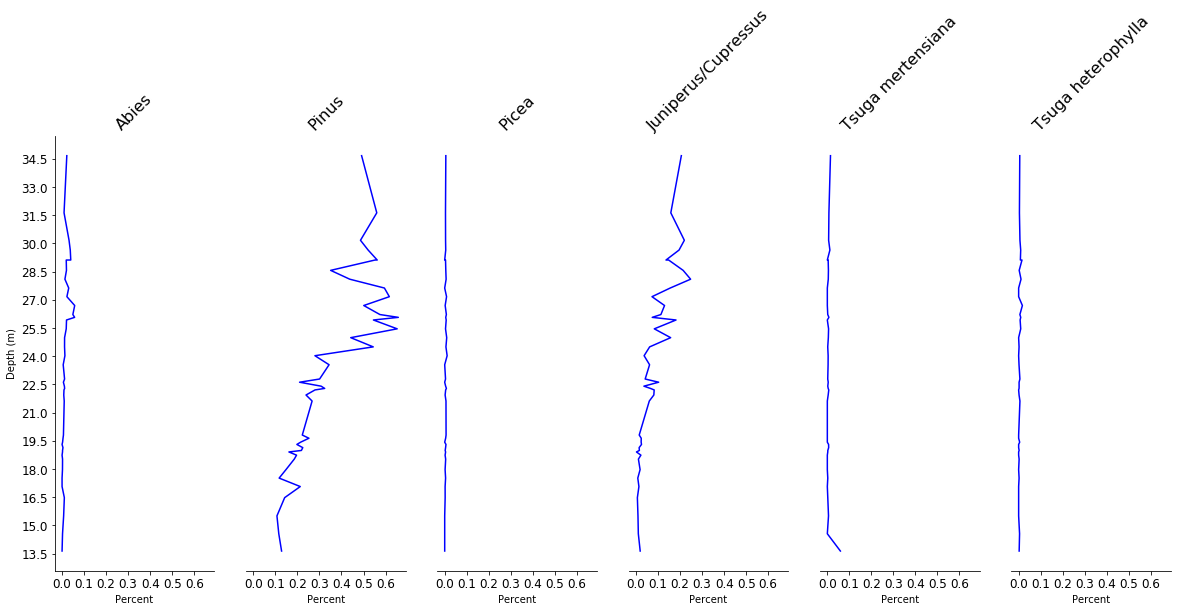

In [15]:
###select which df or data set to operate on
##let data = rcounts this time and compare it to the above mcounts graphs
data = rcounts_clean

#this graphs subplots for each listed species and formats the image

ncols = len(geni_r)

fig, axs = plt.subplots(1, ncols, sharey= True, sharex = True, figsize = (20,8))

for i,ax in enumerate(axs.ravel()):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i > 0:
        ax.get_yaxis().set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)

    genus = geni_r[i]
    ##prevent errors from arising with mcounts data set
    rcounts_clean[genus] = rcounts_clean[genus].apply(float)
    
    if genus not in climate_types.keys():
        col='green' 
    elif climate_types[genus]==0:
        col='red'
    elif climate_types[genus]==1:
        col='blue'
    
    ax.plot(data[genus]/data["Total"],data["Depth"], color = col)
    plt.gca().invert_yaxis()
    #    ax.invert_yaxis()
    ax.set_title(genus, fontsize=16, rotation = 45)
    
    space_x = plticker.MultipleLocator(base=.1) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(space_x)
    
    space_y = plticker.MultipleLocator(base=1.5) # this locator puts ticks at regular intervals
    ax.yaxis.set_major_locator(space_y)
    
    ax.set_ylabel("Depth (m)")
    ax.set_xlabel("Percent")
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

Step 4: Isolate any individual discrepancies between the data sets and attempt to explain them. Find ways of comparing count distributions. What does each set have relatively more/less of? 

Start by considering the difference between the ways conifer sets were counted. This is a significant comparison because conifer pollen is distinct, abundant, and easily identifiable. Both datasets counted lots of conifer pollen.

In [16]:
###find the % of total conifer pollen that went to each genus for r and m:
print('RCOUNT COL SUMS')
for i in geni_r:
    col_sum_r = rcounts_clean.sum(axis=0)[i]
    print(i, col_sum_r)
    
print('MCOUNT COL SUMS')
for i in geni_m:
    col_sum_m = mcounts_clean.sum(axis=0)[i]
    print(i, col_sum_m)

RCOUNT COL SUMS
Abies 301.0
Pinus 7425.0
Picea 83.0
Juniperus/Cupressus 1732.0
Tsuga mertensiana 95.0
Tsuga heterophylla 75.0
MCOUNT COL SUMS
Indeterminate Conifer 374.0
Abies 179.0
Pinus 2786.0
Picea 319.0
Juniperus/Cupressus 0.0
Tsuga mertensiana 58.0
Tsuga heterophylla 19.0


It looks like way more pollen was counted in the mcounts set than in the rcounts set, and at more depths. I think the sets will only be comparable using normed values. 

# Data Visualization 2

Visualize the normalized distribution of conifer counts with a pie chart. Were the same relative abundances visible in each dataset? If not, how were they different and is this consistent with any one explanation? Find the percent of total conifer pollen that went to each genus for r and m:

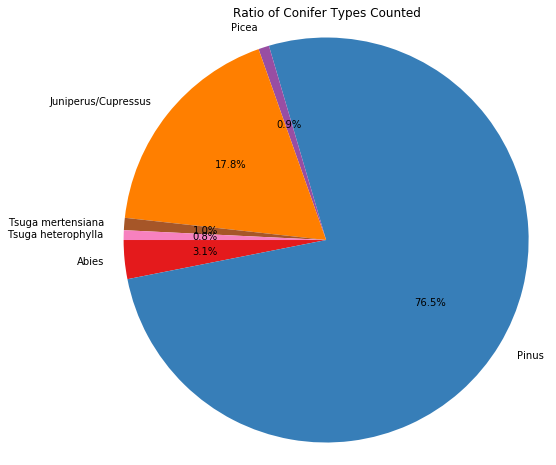

In [17]:
###RCOUNTS CONIFER
conifers_r = ["Abies","Pinus","Picea","Juniperus/Cupressus","Tsuga mertensiana","Tsuga heterophylla"]
total_conifer_r = np.sum(np.sum(rcounts_clean[conifers_r]))

#throughout the core, see how the conifer type breakdown
type_percents_r = []
for tree in conifers_r:
    type_percents_ = (np.sum(rcounts_clean[tree]))/(total_conifer_r)
    type_percents_r.append(type_percents_)
    
type_percents_r = np.array(type_percents_r)

cr=cm.Set1(np.arange(6)/6.)
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(type_percents_r, labels=conifers_r,startangle=180,autopct='%1.1f%%', colors=cr)
ax1.axis('equal')

plt.title('Ratio of Conifer Types Counted')

plt.show()

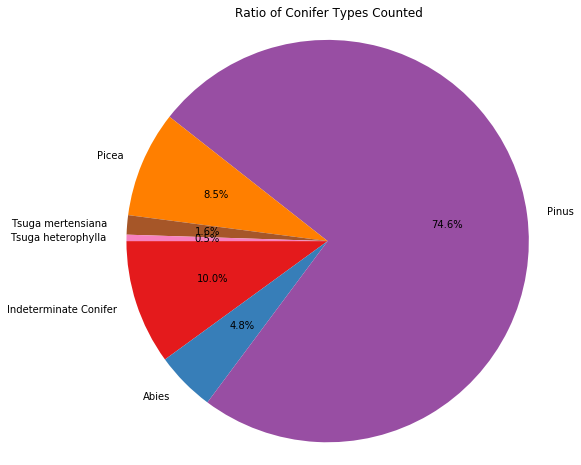

In [18]:
###MCOUNTS CONIFER
conifers_m = ["Indeterminate Conifer","Abies","Pinus","Picea","Tsuga mertensiana","Tsuga heterophylla"]
total_conifer_m = np.sum(np.sum(mcounts_clean[conifers_m]))

#throughout the core, see how the conifer type breakdown
type_percents_m = []
for tree in conifers_m:
    type_percents = (np.sum(mcounts_clean[tree]))/(total_conifer_m)
    type_percents_m.append(type_percents)
    
type_percents_m = np.array(type_percents_m)

cs=cm.Set1(np.arange(6)/6.)
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(type_percents_m, labels=conifers_m,startangle=180,autopct='%1.1f%%', colors=cs)
ax1.axis('equal')

plt.title('Ratio of Conifer Types Counted')

plt.show()

Surprisingly, both sets have very similar amounts of pinus as a percent of the total confifer present. Looking at conifer pollen, at least the identification of pinus appears to be consistent in both sets. That bodes well for their overall accuracy since pine is such a large fraction of the pollen counted.

# Data Visualization 3 & 3.5

NOTE: There are only so many relevant ways to visualize this data for the sake of the questions being asked. The first image is a modified version of the more standard pollen diagrams above that allows us to see the sets together for a better comparison, and the second was an informative attempt to model overall pollen deposition rates visually.

Step 5: Compare overall trends in the data sets, is there a pattern to the discrepancies?

Overlay the two normalized datasets in order to visualize the differences in distributions. Note that we can only compare the distributions for categories which were the same across the sets, so this comparison is limted.

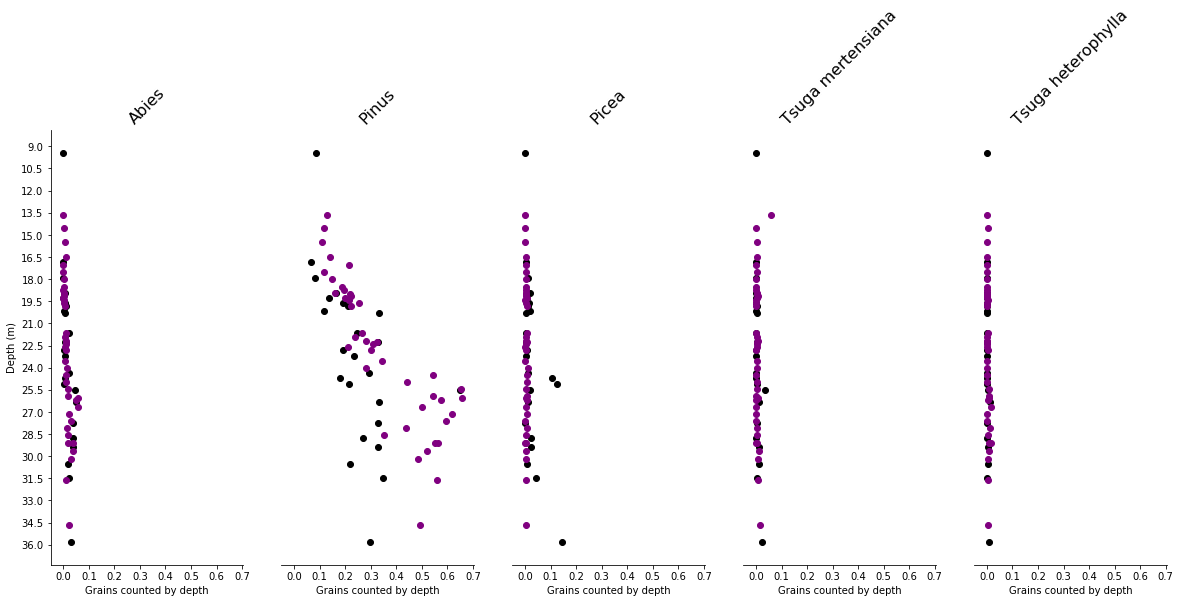

In [19]:
###graph mcounts and rcounts over each other to compare distribution shapes

geni_compare = ['Abies','Pinus','Picea',"Tsuga mertensiana","Tsuga heterophylla"]
ncols = len(geni_compare)

fig, axs = plt.subplots(1, ncols, sharey= True, sharex = True, figsize = (20,8))

for i,ax in enumerate(axs.ravel()):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i > 0:
        ax.get_yaxis().set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)

    genus = geni_compare[i]
    ##prevent errors from arising with mcounts data set
    rcounts_clean[genus] = rcounts_clean[genus].apply(float)
    
    ax.scatter(mcounts_clean[genus]/mcounts_clean["Total"],mcounts_clean["Depth"], color = 'black')
    #ax.scatter(mcounts_clean[genus],mcounts_clean["Depth"], color = 'black')
    ax.scatter(rcounts_clean[genus]/rcounts_clean["Total"],rcounts_clean["Depth"], color = 'purple')
    #ax.scatter(rcounts_clean[genus],rcounts_clean["Depth"], color = 'purple')

    ax.set_title(genus, fontsize=16, rotation = 45)
    ax.invert_yaxis()
    
    ax.set_ylabel("Depth (m)")
    ax.set_xlabel("Grains counted by depth")
    
    space_x = plticker.MultipleLocator(base=.1) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(space_x)
    
    space_y = plticker.MultipleLocator(base=1.5) # this locator puts ticks at regular intervals
    ax.yaxis.set_major_locator(space_y)

Compare the overall pollen deposition rates. If both samples are represntatve, then these plots should look similar regardless of misidentification. This is useful to us because although it misses the detail of the genus level distributions above, it includes types which were different between the two datasets giving a fuller picture of the abundances at each depth.

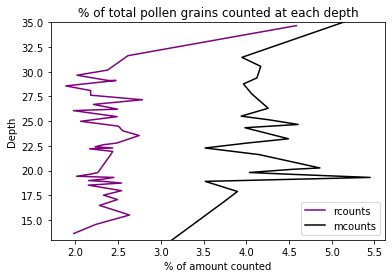

In [88]:
# ###Function for plotting relative pollen amount at each depth. These should ideally be the same across any two
# ####samples as long as pollen was being counted, regardless of misidentification
# plot what percent of the total pollen counted was present at each depth (by sample)
# ###graph mcounts and rcounts over each other to compare distribution shapes

r = rcounts_clean["Total"] / (np.sum(rcounts_clean["Total"]))   
m = mcounts_clean["Total"] / (np.sum(mcounts_clean["Total"]))

rcounts_clean[genus] = rcounts_clean[genus].apply(float)
    
plt.plot((r * 100), rcounts_clean["Depth"], label = 'rcounts', color='purple')
plt.plot((m * 100), mcounts_clean["Depth"], label = 'mcounts', color='black')
ax.invert_yaxis()
ax.set_title(genus, fontsize=16, rotation = 45)

#boring formatting stuff
##NOTE TO SELF try integrating under each curve and checking that it equals 100%
plt.ylim(13,35)
plt.xlabel('% of amount counted')
plt.ylabel('Depth')
plt.title('% of total pollen grains counted at each depth')
plt.legend(loc = 4)
    
ax.set_ylabel("Depth (m)")
ax.set_xlabel("Grains counted by depth")
    
space_x = plticker.MultipleLocator(base=.1) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(space_x)
    
space_y = plticker.MultipleLocator(base=1.5) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(space_y)

It looks like mcounts has a consistently higher fraction of its grains counted at these depths. Part of this is because rcounts has data for more depths. This is an important point to note that I wished I had realized sooner, as it may have led me to consider different comparison metrics.

Step 6: Perform a statistical comparison to see how similar the data sets are. Answer the question: is the margin of error negligible or not?

First, visualize how different a genus with clear variation between the two sets is. Pull out the graph of pine. This is done by modifying the graphs from above again. A scatter plot lets us see the outliers more clearly.

Text(0.5, 0, 'Grains counted by depth')

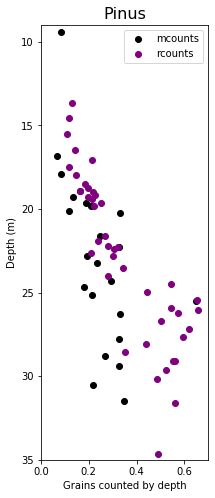

In [73]:
plt.figure(figsize = (3,8))

plt.scatter(mcounts_clean['Pinus']/mcounts_clean["Total"],mcounts_clean["Depth"], color = 'black', label='mcounts')
#ax.scatter(mcounts_clean[genus],mcounts_clean["Depth"], color = 'black')
plt.scatter(rcounts_clean['Pinus']/rcounts_clean["Total"],rcounts_clean["Depth"], color = 'purple', label='rcounts')
#ax.scatter(rcounts_clean[genus],rcounts_clean["Depth"], color = 'purple')

plt.title('Pinus', fontsize=16)
plt.ylim(9,35)
plt.xlim(0,0.7)
plt.legend()

plt.gca().invert_yaxis()

space_x = plticker.MultipleLocator(base=.1) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(space_x)
    
space_y = plticker.MultipleLocator(base=1.5) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(space_y)
    
plt.ylabel("Depth (m)")
plt.xlabel("Grains counted by depth")

# Data Analysis 1

Linear regression plots can only yield so much information when based on one variable. What might be more informative is a Multiple Linear Regression plot, where more than one variable is considered in the plot. However, the functions which would help me do this require a totally different data set up from the one I intially created for stratigraphic diagrams! Too bad, this seems to be a common problem in data science, I'll get over it. Time to set up an appropriate dataframe for this purpose.

First that will require compiling each type of data from the two sets into one item. Then we can make a dataframe which includes values for both sets.

In [24]:
# Create a dataframe for which you can properly run linear regression on both sets
depths = rcounts_clean['Depth'].append(mcounts_clean['Depth'])
pinus_by_depth = rcounts_clean['Pinus'].append(mcounts_clean['Pinus'])
totals = rcounts_clean['Total'].append(mcounts_clean['Total'])

In [80]:
# Add these values to a dataframe
frame = { 'Depths': depths, 'Pinus': pinus_by_depth, 'Total': totals } 
mr_pinus = pd.DataFrame(frame) 

# Specify which values are from which set (mcounts or rcounts)
dataset = []

for i in range (0,42):
    dataset.append('r')
for i in range (43,67):
    dataset.append('m')

# New combined dataset is called 'mr_pinus'
mr_pinus['dataset'] = dataset
mr_pinus

,Depths,Pinus,Total,dataset
1,13.64,54.0,422.0,r
2,14.56,55.0,477.0,r
3,15.51,60.0,561.0,r
4,16.48,69.0,486.0,r
5,17.07,113.0,531.0,r
...,...,...,...,...
20,28.77,122.0,452.0,m
21,29.38,154.0,470.0,m
22,30.55,104.0,475.0,m
23,31.46,156.0,450.0,m


In [26]:
# Use the new df to recalculate the relative amount at each depth, but for both sets this time
frac = (mr_pinus['Pinus']/mr_pinus['Total'])

While we're at it, let's do a quick statistical calculation of correlation. Hmm... seems like it could be useful if I knew how to interpret it, but I'll be better of with metrics I understand.

In [27]:
# Take a look at the correlation between values from the two sets
pearson_coef, p_value = stats.pearsonr(frac, depths)
pearson_coef, p_value

(0.6971680266395643, 7.884226100014144e-11)

It turns out that my indexes get the 'mlr.fit()' function totally confused, well thankfully I can switch my naming conventions to make them condusive to multiple linear regression.

In [28]:
mr_pinus = mr_pinus.replace(to_replace={'r' : 0, 'm': 1})
mr_pinus

,Depths,Pinus,Total,dataset
1,13.64,54.0,422.0,0
2,14.56,55.0,477.0,0
3,15.51,60.0,561.0,0
4,16.48,69.0,486.0,0
5,17.07,113.0,531.0,0
...,...,...,...,...
20,28.77,122.0,452.0,1
21,29.38,154.0,470.0,1
22,30.55,104.0,475.0,1
23,31.46,156.0,450.0,1


In [29]:
# Try this using a different model for the data, multiple linear regression
# Create linear regression object.
mlr= LinearRegression()

# Fit linear regression.
mlr.fit(mr_pinus[['Pinus','Total','dataset']], mr_pinus['Depths'])

# Get the slope and intercept of the line best fit.
yint = mlr.intercept_ 
print(mlr.intercept_)
coef = mlr.coef_
print(mlr.coef_)

14.969883659670058
[ 4.58722217e-02 -2.31284489e-04  3.22618753e+00]


Interesting! The pearson coefficient of correlation from above was totally different than these numbers. I could have excluded it entirely, but I think it helps show that Multiple Linear Regression is a more appropriate model for this data than single variable regression. Now let me calculate the Mlr line equations from these values in order to graph them. I use a scatter plot to smooth some of the up and down.

In [30]:
for i in mr_pinus[0:42]:
    depth_r = 14.969883659670058 + 4.58722217e-02*mr_pinus['Pinus'] - 2.31284489e-04*mr_pinus["Total"]

for i in mr_pinus[43:67]:
    depth_m = 14.969883659670058 + 4.58722217e-02*mr_pinus['Pinus'] - 2.31284489e-04*mr_pinus["Total"] + 3.22618753e+00

Text(0.5, 1.0, 'multiple linear regression on both datasets')

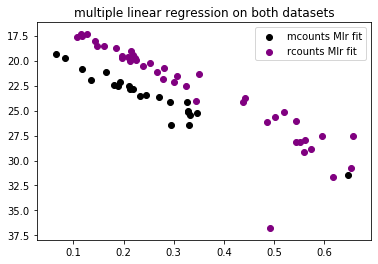

In [76]:
#Depth = 14.969883659670058 + 4.58722217e-02*Pinus - 2.31284489e-04*Total + 3.22618753e+00*SETVALUE
#### If mcounts: setvalue=1, if rcounts: setvalue=0

# Plot a the multiple linear regression model line for the combined datasets
plt.scatter(frac[43:67], depth_m[43:67],c='black',label='mcounts Mlr fit')
plt.scatter(frac[0:42], depth_r[0:42],c='purple',label='rcounts Mlr fit')
plt.gca().invert_yaxis()
plt.legend()
plt.title('multiple linear regression on both datasets')

Out of context that plot isn't all that helpful for determining similarity since the sets have different numbers of data points. Let's plot the residuals in order to get a better sense of the similarity between these two lines.

Text(0.5, 1.0, 'Multiple linear regression residuals plot')

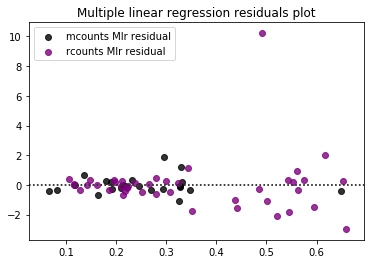

In [79]:
# Plot the residuals
sns.residplot(frac[43:67], depth_m[43:67], color='black',label='mcounts Mlr residual')
sns.residplot(frac[0:42], depth_r[0:42], color='purple',label='rcounts Mlr residual')
plt.legend()
plt.title('Multiple linear regression residuals plot')

# Data Analysis 2

Well, that looks pretty clustered around zero with the exception of some outliers, but let's calculate some more error estimates. Maybe these will giver more detail on the error.

In [114]:
## Set up a confidence interval calculator for rcounts
sample_size_r = 43

intervals_r = []
sample_means_r = []

for sample in range(25):
    sample_r = np.random.choice(a= frac[0:42], size = sample_size)
    sample_mean_r = sample_r.mean()
    sample_means_r.append(sample_mean_r)
    
    z_critical_r = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         
    pop_stdev_r = frac[0:42].std()  # Get the population standard deviation
    stats.norm.ppf(q = 0.025)

    margin_of_error_r = z_critical_r * (pop_stdev_r/math.sqrt(sample_size_r))
    confidence_interval_r = (sample_mean_r - margin_of_error_r, sample_mean_r + margin_of_error_r)  
    intervals_r.append(confidence_interval_r)

In [115]:
## Set up a confidence interval calculator for mcounts
sample_size_m = 25

intervals_m = []
sample_means_m = []

for sample in range(25):
    sample_m = np.random.choice(a= frac[43:67], size = sample_size)
    sample_mean_m = sample_m.mean()
    sample_means_m.append(sample_mean_m)
    
    z_critical_m = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         
    pop_stdev_m = frac[43:67].std()  # Get the population standard deviation
    stats.norm.ppf(q = 0.025)
    
    margin_of_error_m = z_critical_m * (pop_stdev_m/math.sqrt(sample_size_m))
    confidence_interval = (sample_mean_m - margin_of_error_m, sample_mean_m + margin_of_error_m)  
    intervals_m.append(confidence_interval)

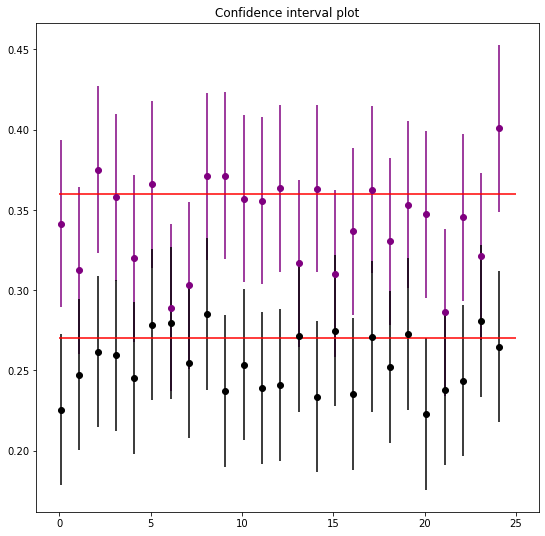

In [116]:
#Plot both confidence intervals and see how much the overlap
plt.figure(figsize=(9,9))
plt.title('Confidence interval plot')

####RPLOTS
plt.errorbar(x=np.arange(0.1, 25, 1), y=sample_means_r, yerr=[(top-bot)/2 for top,bot in intervals_r],
    fmt='o',color='purple')
plt.hlines(xmin=0, xmax=25,y=0.36,color="red")

####MPLOTS
plt.errorbar(x=np.arange(0.1, 25, 1), y=sample_means_m, yerr=[(top-bot)/2 for top,bot in intervals_m],
    fmt='o',color='black')
plt.hlines(xmin=0, xmax=25,y=0.27,color="red")

Yikes. Well that's not ideal. It seems like the sets just aren't all that comparable even using multiple linear regression. I wonder if this result would be the same for all genera, and to what extent the different depths measured from both sets would affect this.

# Conclusions

The primary useful result of this analysis comes from Data Visualization 2, which show that pine comprises a similar majority of the conifer pollen across both sets. This implies a source of consistency, and negates some of the worst possibilities of misidentification. Similar can be said for Tsuga mertensiana and Tsuga heterophylla. Juniperus/Cupresses might have been misidentified as Picea or Abies in mcounts, but seeing as it wasn't explicitly counted in mcounts, this is a challenging conclusion to draw. 

Additionally, the linear regressions plotted yield considerable error. I would have used another metric, but had considerable difficulties wrangling the data as is. Furthermore, it's possible that these confidence intervals are not correctly calculated and therefore statistically invalid. I'm not entirely sure of what sample size would be necessary to assume a standard distribution from this type of data, or if these sets meet that value. In terms of outliers, for example, it seems inappropriate to discount them since the painstaking methodology by which the data were collected should give meaningful results.

In all analysis plots there were parallel but slightly offset values for each set. I unsure why this is exactly, and curious why it persists throughout all the sets. Visible in the overall pollen deposition rates is similar relative rates, but ones which were overall much higher in mcounts. This is probably because rcounts includes almost twice as many individual grain counts as mcounts, but at more depths leading to an overall lower deposition number per depth. This metric is also imperfect because I did not have the availible sediment data to combine will pollen for deposition rates, so mine were calculated assuming constant sediment deposition when this is almost certainly not the reality.

Overall this was a useful excersize, and has exposed me more thoroughly to both the methods used in class and new ones. It has also made me realize that I desparately need to take a real statistics class. From this project I was able to quantify the similarity between the sets (see confidence iterval graphs), but I would want to revise the methodology with which it was calculated before drawing and real conclusions from it.

# Acknowledgements

Thank you Prof. Swanson-Hysell, Erin, and Justin for the course. Please see the 'Components' section for sources, it's broken down by where they were used.

Additional thanks to whomever created Stack Overflow (which I did not cite due to the excessive number of pages visited, and the impossibility of counting them all), and everyone who answers questions there.

Thank you to Prof. Dave Wahl (UC Berkeley Geography, USGS) for the opportunity to do real science, and for introducing me to palynology.

Lastly, very special thanks to M. Champagne (USGS) for providing the two datasets used. My respect and admiration goes the late founder of Berkeley's QPL, Prof. Roger Byrne, and M. Champagne for producing the datasets, and for their hundreds of hours counting 32,696 individual grains of Clear Lake pollen.